In [2]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
import random
from torch.utils.data.dataset import TensorDataset
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
from pytorch_lightning import Trainer
import os
import numpy as np
import pandas as pd
from os.path import join
from typing import Optional
from config import processed_data_path
from sklearn.utils import shuffle
from tqdm.notebook import tqdm
from optuna.integration import PyTorchLightningPruningCallback
from scipy.stats import wasserstein_distance 
import joblib
import optuna
%matplotlib inline
from matplotlib import pyplot as plt
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from sklearn.metrics import r2_score
from scipy.stats import wasserstein_distance
import threading
import concurrent
from sklearn.metrics import r2_score
#from zStudy_R2 import VAE, _dataset, compare_integer, compare_continuous
from os.path import join, basename, exists
from os import getcwd
import sqlite3

In [9]:
con = sqlite3.connect("optimization.db")
cursor = con.cursor()

cursor.execute("SELECT * FROM studies")
names = [x[1] for x in cursor.fetchall()]
#names = sorted(names, key=lambda x: int(x.split("-")[1].replace(' zdim ', '').replace(' ', '')))
del con, cursor
names

['Optimizing the VAE with R2 - BKG vs Reconstruction',
 'Optimizing the VAE with WD - BKG vs Random Sampling']

In [10]:
names_r2 = [x for x in names if "R2" in x]
names_wd = [x for x in names if "WD" in x]

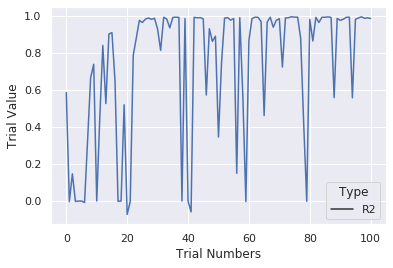

In [23]:

for name in tqdm(names_r2):
    #zdim = int(name.split("-")[1].replace(' zdim ', '').replace(' ', ''))
    study = optuna.load_study(study_name=name, storage="sqlite:///optimization.db")

   
    df = pd.DataFrame([])
    df['Trial Value'] = [x.value for x in study.trials if x.value is not None]
    df['Trial Numbers'] = [x.number for x in study.trials if x.value is not None]
    if "R2" in name:
        df['Type'] = 'R2'
    else:
        df['Type'] = 'WD'

df.reset_index(inplace=True)

import seaborn as sns
sns.set_theme(style="darkgrid")
sns.lineplot(x="Trial Numbers", y="Trial Value",
             style="Type",
             data=df)

<ErrorbarContainer object of 3 artists>

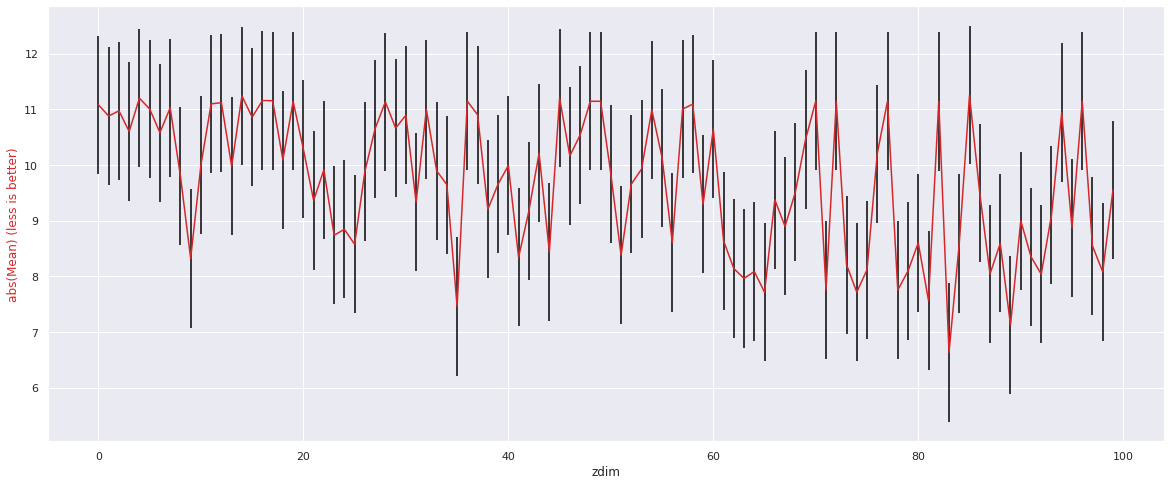

In [32]:
fig, ax1 = plt.subplots(figsize=(20,8))

color = 'tab:red'
ax1.set_xlabel('zdim')
ax1.set_ylabel('abs(Mean) (less is better)', color=color)

ax1.errorbar(df['Trial Numbers'], df['Trial Value'], yerr=(np.std(df['Trial Value'])), ecolor="black", color=color)

In [24]:
a = df

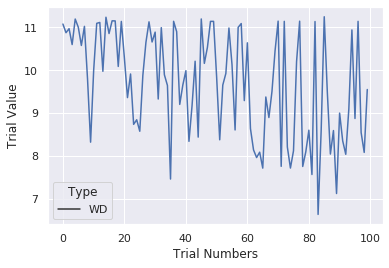

In [25]:

for name in tqdm(names_wd):
    #zdim = int(name.split("-")[1].replace(' zdim ', '').replace(' ', ''))
    study = optuna.load_study(study_name=name, storage="sqlite:///optimization.db")

   
    df = pd.DataFrame([])
    df['Trial Value'] = [x.value for x in study.trials if x.value is not None]
    df['Trial Numbers'] = [x.number for x in study.trials if x.value is not None]
    if "R2" in name:
        df['Type'] = 'R2'
    else:
        df['Type'] = 'WD'

df.reset_index(inplace=True)

import seaborn as sns
sns.set_theme(style="darkgrid")
sns.lineplot(x="Trial Numbers", y="Trial Value",
             style="Type",
             data=df)

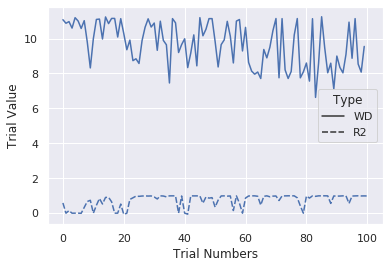

In [27]:

import seaborn as sns
sns.set_theme(style="darkgrid")
sns.lineplot(x="Trial Numbers", y="Trial Value",
             style="Type",
             data=pd.concat([df,a]).reset_index())